# Importing Libraries

In [1]:
import os,sys 
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import pickle
import lasio  # las files 
import numpy as np
from scipy.interpolate import interp1d
import warnings
from scipy.optimize import curve_fit

C:\Users\FArshad\AppData\Local\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\FArshad\AppData\Local\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\FArshad\AppData\Local\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Reading Las Data

In [2]:
df = lasio.read(r"F:\WELL-1.LAS").df().reset_index()
df["DT"] = df["DT"]/0.3048 #us/ft to us/m

In [3]:
import matplotlib
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=30)
font = {'size'   : 35,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]


def curves_plot(df,plotting,**kwargs):
    dc={}
    for key, value in kwargs.items():
        dc[key]=value
    a = df.copy()
    m = int(df["GR"].max())
    d = []
    for i in df["GR"]:
        z = np.nan*(np.ones(m))
        z[:int(i)+1] = i
        z = z.reshape(1,-1)
        d.append(z)
    gr = pd.DataFrame(np.concatenate(d))
    ratio = np.ones(len(plotting))
    try:
        profile_index = plotting.index("Pressure Profile")
        ratio[profile_index]  = 4
    except:
        pass
    fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(27,10),sharey=True, gridspec_kw={'width_ratios': list(ratio)})
    fig.subplots_adjust(wspace=0.12)
    for j,i in enumerate(plotting):
        if i=="RHOB":
            ax[j].plot(a[i],a["MD"],label="RHOB",linewidth=4,color="black")

            ax[j].spines["top"].set_position(("axes", 1))

            ax[j].spines["top"].set_visible(True)
            ax[j].spines["top"].set_edgecolor("blue")
            ax[j].set_xlabel("RHOB",fontdict={"fontsize":25,"fontweight":'bold'})
            ax[j].xaxis.set_label_position("top")

        elif i=="LLD":
            ax[j].semilogx(a[i],a["MD"],label="ILD",linewidth=4,color="black")

            ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})


        elif i=="DT":
            ax[j].plot(a[i],a["MD"])


            ax[j].spines["top"].set_position(("axes", 1))

            ax[j].spines["top"].set_visible(True)
            ax[j].set_xlabel("DT",fontdict={"fontsize":25,"fontweight":'bold'})
            ax[j].xaxis.set_label_position("top")

            


        elif i=="Pressure Profile":
            ax[j].plot(a["Ovb Pressure"]/1e6,a["MD"],color="green",linewidth=3,label="Overburden")
            try:
                ax[j].plot(a["Hydrostatic Pressure"]/1e6,a["MD"],color="purple",linewidth=3,label="Hydrostatic")
            except:
                pass
            
            try:
                ax[j].plot(a["Pore_Pressure"]/1e6,a["MD"],color="red",linewidth=4,label="PorePressure")
            except:
                pass
            
            try:
                ax[j].plot(a["Sh_lower"]/1e6,a["MD"],color="blue",linewidth=4,linestyle='dashed',label="Horizontal\nMinimum\nStress")
                ax[j].plot(a["Sh_upper"]/1e6,a["MD"],color="black",linewidth=4,linestyle='dashed',label="Horizontal\nMaximum\nStress")
                ax[j].fill_betweenx(a["MD"].values,a["Pore_Pressure"]/1e6, a["Sh_lower"]/1e6 , facecolor='mediumseagreen')
            except:
                pass
            



            ax[j].spines["top"].set_position(("axes", 1))
            ax[j].spines["top"].set_visible(True)
            ax[j].set_xlabel("Pressure",fontdict={"fontsize":25,"fontweight":'bold'})
            ax[j].xaxis.set_label_position("top")
            ax[j].legend(loc=1,fontsize=15)




        elif i=="VCL":
            ax[j].fill_betweenx(a['MD'],a["VCL"],0, interpolate=True, color='green')
            ax[j].fill_betweenx(a['MD'],1,a["VCL"], interpolate=True, color='yellow')
            ax[j].plot(a["VCL"],a["MD"],color="black")

            ax[j].set_title("Clay\nVolume",fontdict={"fontsize":30,"fontweight":'bold'})

        elif i=="PHIE":
            ax[j].fill_betweenx(a['MD'],a[i],0, interpolate=True, color='brown')
            ax[j].fill_betweenx(a['MD'],1,a[i], interpolate=True, color='black')
            ax[j].plot(a[i],a["MD"],color="black")
            ax[j].set_xlim([0,a[i].max()])
            ax[j].set_title("PHIE",fontdict={"fontsize":30,"fontweight":'bold'})
            
        elif i==f"DT_{smooth}":
            print(2)
            ax[j].scatter(df['DT'],df['MD'], c='gray', s=1,label='DT')
            ax[j].scatter(df[f"DT_{smooth}"],df['MD'],c='b',s=3,label='DTC (filtered)')
            ax[j].set_title(f"DT_{smooth}",fontdict={"fontsize":30,"fontweight":'bold'})
       
                
          
            
            try:
                if dc["fit"]==True:
                    print(1233)
                    x, y = df["MD"], df[f"DT_{smooth}"]
                    popt, _ = curve_fit(objective, x, y)
                    aa, bb = popt
                    z  = '%.5f * x + %.5f' % (aa, bb)
                    d = eval(z)
                    ax[j].plot(d,df["MD"],color="red",linewidth=3)
            except:
                pass
            
            try:
                ax[j].plot(df["DT_NCT"],df["MD"],color="black",linewidth=3)
                ax[j].set_title("DT_NCT",fontdict={"fontsize":30,"fontweight":'bold'})
            except:
                pass
          
    


        elif i=="GR":

            a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["MD"].max(),a["MD"].min()])
            ax[j].fill_betweenx(a['MD'],a["GR"], a["GR"].max(), interpolate=True, color='white')
            ax[j].set_title(i,fontdict={"fontsize":30,"fontweight":'bold'})
            ax[j].grid(False)

            ax[j].set_title(i,fontdict={"fontsize":30,"fontweight":'bold'})   
        ax[0].set_ylabel("MD (meters)")
        ax[0].set_yticks(np.flip(np.arange(int(a["MD"].min()/10)*10,int(a["MD"].max()/10)*10,50)))

# Normal Compaction Trends

$$
P_{pg}=\sigma v_{g}-\left(\sigma v_{g}-P_{hg}\right)\left(\frac{\Delta t_n}{\Delta t}\right)^m 
$$
$$
\Delta t_n=\Delta t_m-\left(\Delta t_{ml}-\Delta t_m\right)\,e^{-cz}
$$

In [4]:
def smoothing(window,data):
    min_per = 1 
    data = data.copy()
    data[f'DT_{window}']= data['DT'].rolling(window,min_periods=min_per, center=True).median()
    return data
global smooth
smooth = 50
df = smoothing(smooth,df)

2


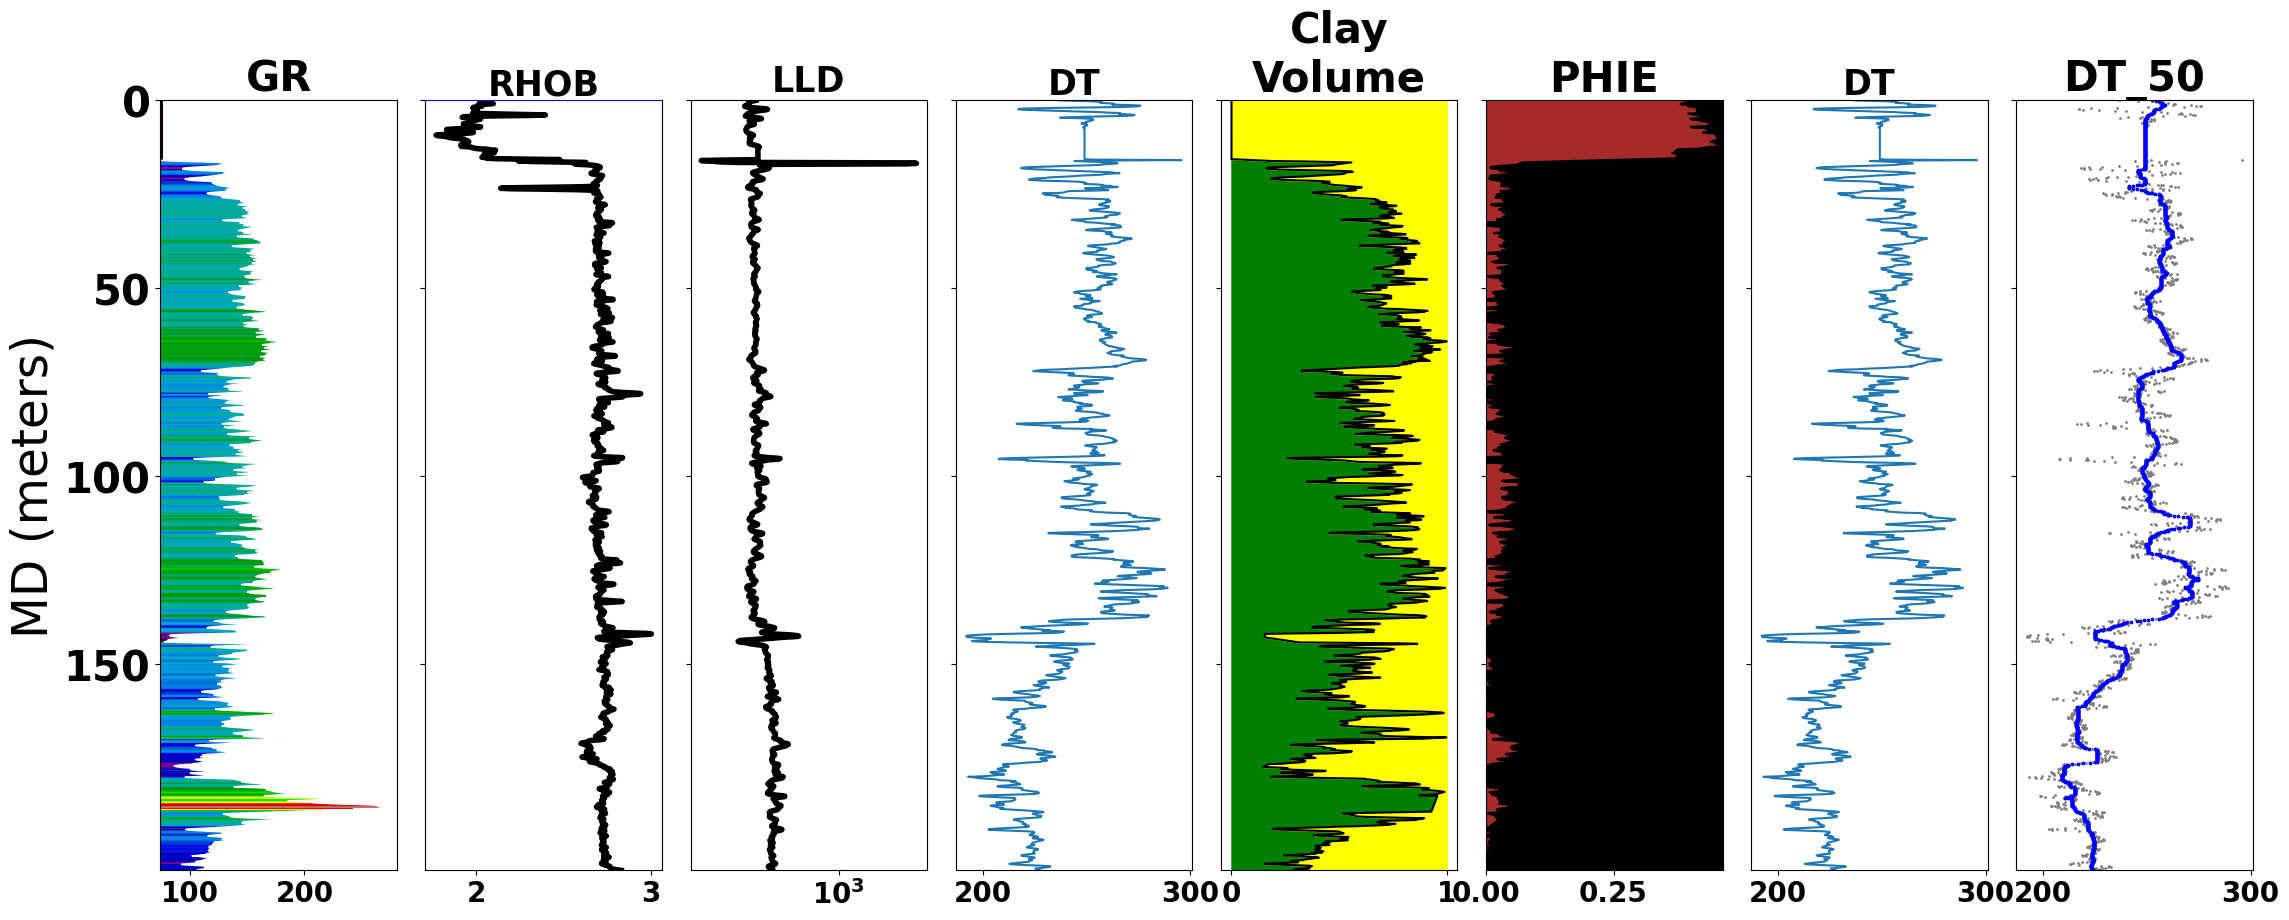

In [5]:
curves_plot(df,["GR","RHOB","LLD","DT","VCL","PHIE","DT",f"DT_{smooth}"])

#### Fitting Curves

### Linear

In [6]:
def objective(x, a, b):
    return a * x + b

In [7]:
x, y = df["MD"], df[f"DT_{smooth}"]
popt, _ = curve_fit(objective, x, y)
a, b = popt
z  = '%.5f * x + %.5f' % (a, b)
print(z)

-0.19475 * x + 264.81387


2
1233


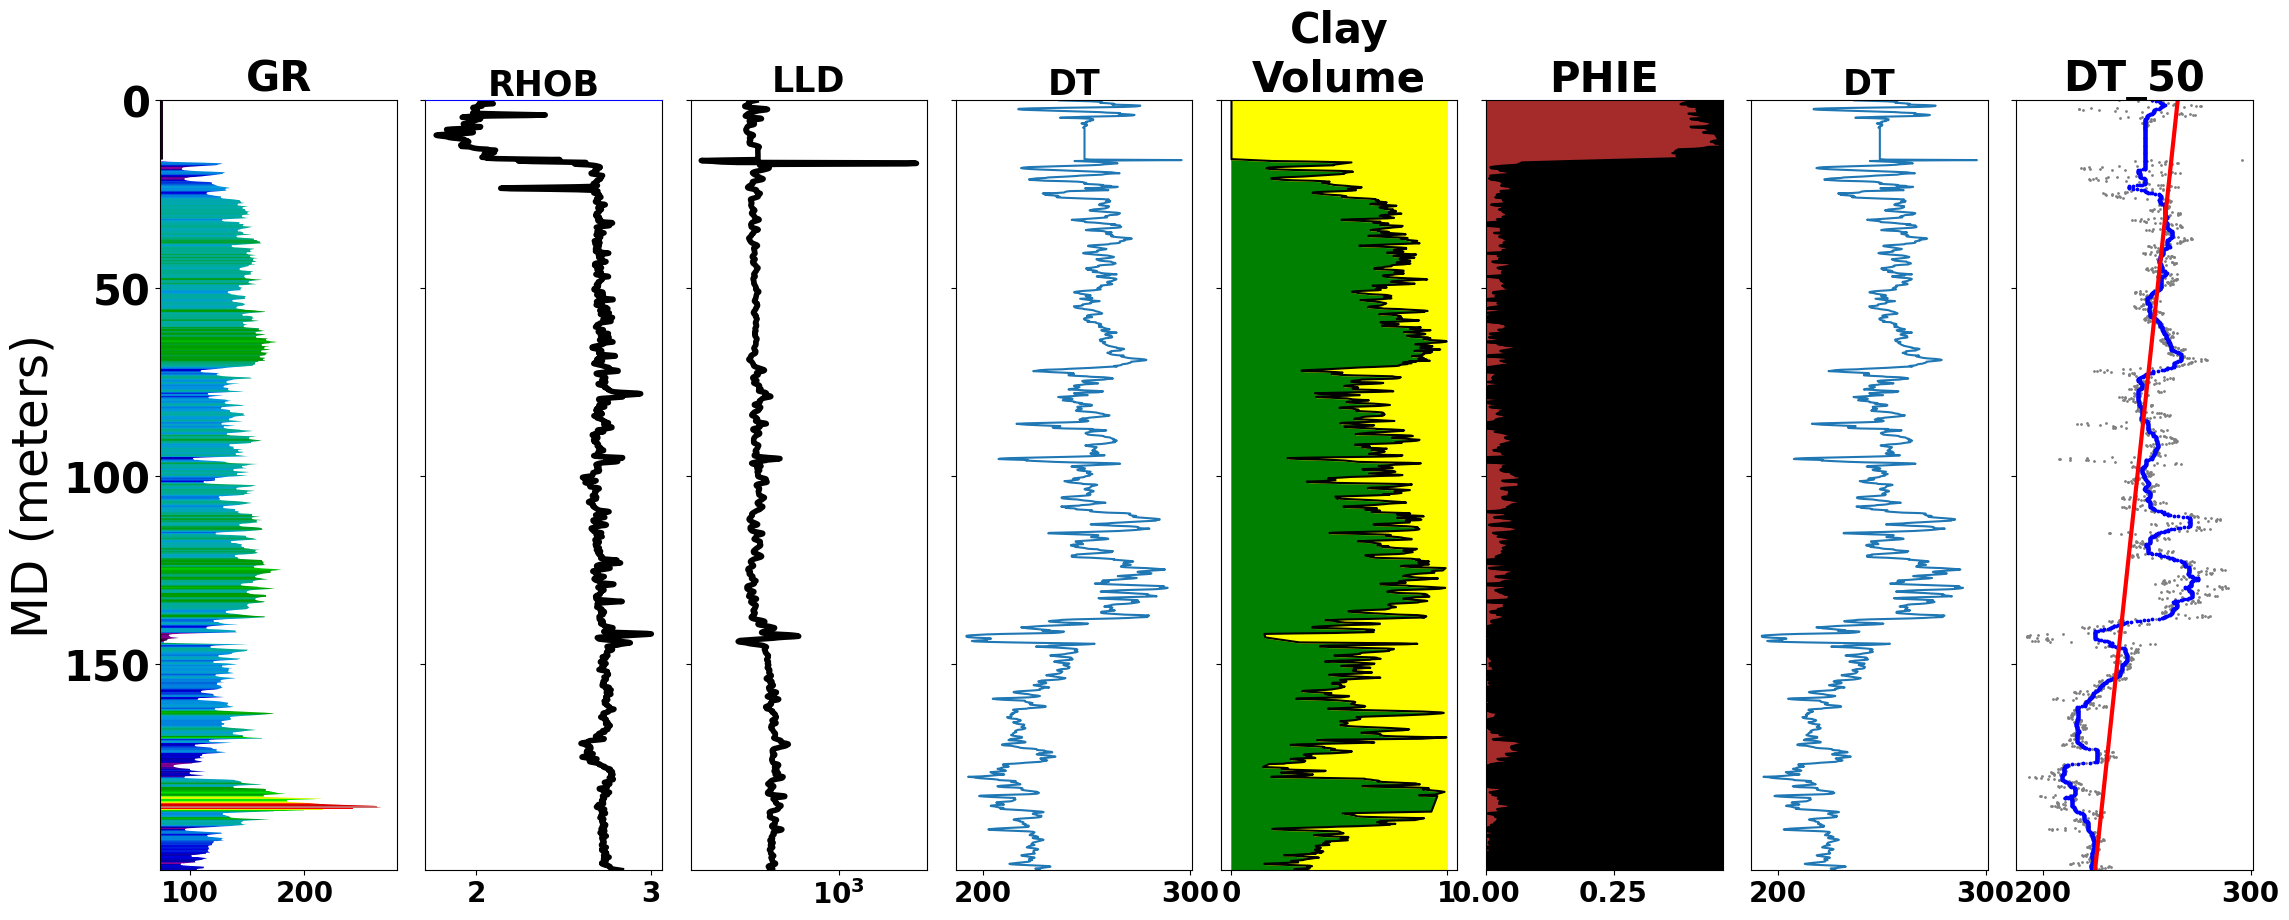

In [8]:
curves_plot(df,["GR","RHOB","LLD","DT","VCL","PHIE","DT",f"DT_{smooth}"],fit=True)

### Exponential

In [9]:
def exp_fit(xx, aa, bb, cc): 
    return xx + (aa - xx) *  np.exp(-cc*bb) 

In [10]:
df["DT_NCT"] = exp_fit(a, b, df["TVD"], cc=0.00192)

2
1233


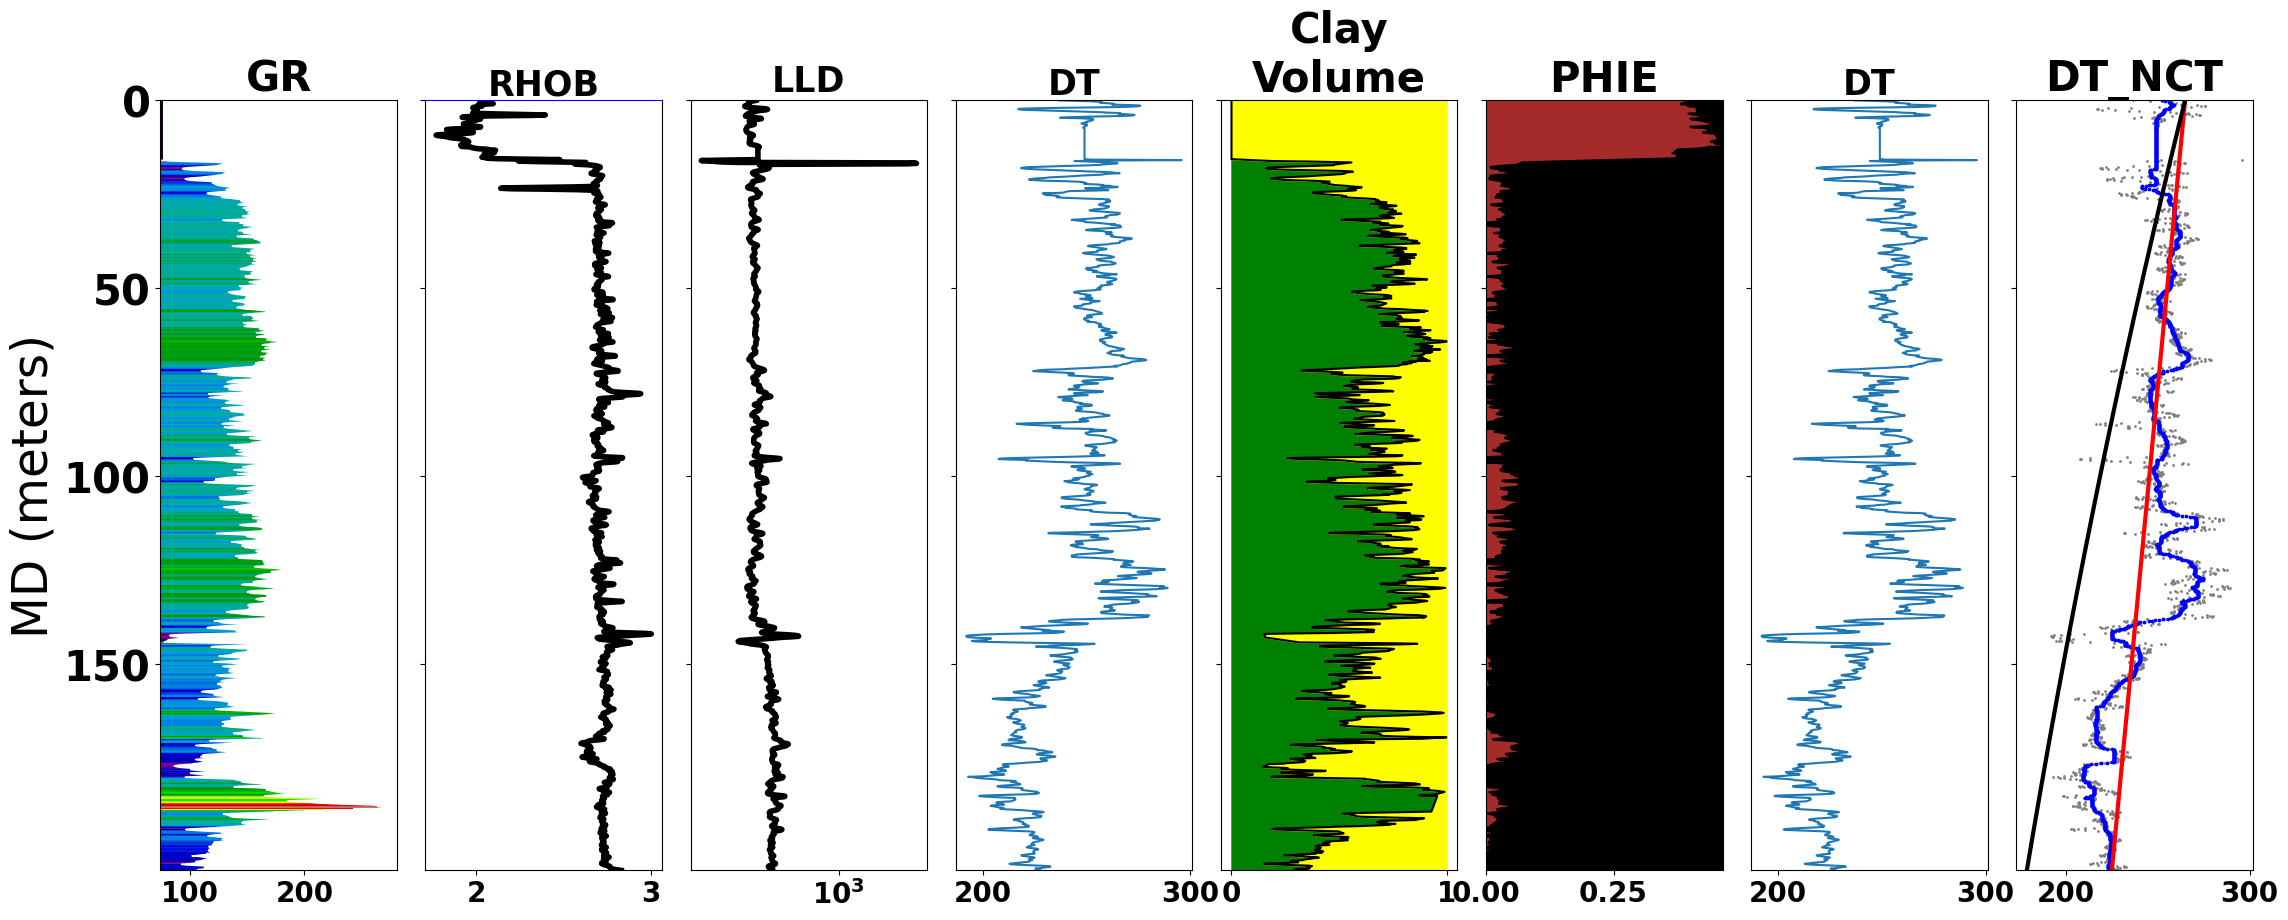

In [11]:
curves_plot(df,["GR","RHOB","LLD","DT","VCL","PHIE","DT",f"DT_{smooth}"],fit=True)

# Overburden Pressure

$$
\sigma v_{g}=\frac{\left(P_{sea}+\int_0^Z\rho_b(Z)\,g\,dZ\right)-P_{sea}}{Z}\label{eq:OBG_def}=\frac{\int_0^Z\rho_b(Z)\,dZ}{Z}\,g\
$$

In [12]:
gravity = 9.81
Mudline = 1000
density_seawater= 1.024
P_mudline = density_seawater * gravity * Mudline*1000
P_mudline

10045440.0

In [13]:
def overburden_pressure(df, density, intial):
    
    change = np.concatenate([np.array([np.diff(df["TVD"]).mean()]),np.diff(df["TVD"])])
    ovp = intial + np.cumsum(density*1000*gravity*change) 
    return ovp

In [14]:
df["Ovb Pressure"] = overburden_pressure(df,density=df['RHOB'],intial = P_mudline)
df['Overburden_Gradient'] = df['RHOB'] *gravity*density_seawater*1000 
df

,MD,TVD,GR,LLD,RHOB,DT,VCL,PHIE,DT_50,DT_NCT,Ovb Pressure,Overburden_Gradient
0,0.0000,0.0000,76.2033,7.4662,2.0220,236.719488,0.00000,0.40234,252.375328,264.813867,1.004792e+07,20311.879680
1,0.1250,0.1250,76.2033,6.3797,2.0220,245.555118,0.00000,0.40234,254.143373,264.750272,1.005040e+07,20311.879680
2,0.2500,0.2500,76.2033,5.6261,2.0220,252.375328,0.00000,0.40234,255.911417,264.686693,1.005288e+07,20311.879680
3,0.3750,0.3750,76.2033,5.1995,2.0252,255.911417,0.00000,0.40047,256.197671,264.623129,1.005536e+07,20344.025088
4,0.5000,0.5000,76.2033,4.8673,2.0408,257.545932,0.00000,0.39135,256.483924,264.559581,1.005786e+07,20500.733952
...,...,...,...,...,...,...,...,...,...,...,...,...
1634,204.2475,204.2475,110.7393,19.3581,2.7705,225.314304,0.34153,0.00000,223.575295,178.844873,1.537219e+07,27830.891520
1635,204.3725,204.3725,106.7476,20.0492,2.7780,225.558727,0.30206,0.00000,223.860892,178.801909,1.537560e+07,27906.232320
1636,204.4975,204.4975,105.7287,19.7622,2.7923,226.660433,0.29198,0.00000,223.575295,178.758955,1.537902e+07,28049.882112
1637,204.6225,204.6225,108.1828,18.6457,2.8107,227.619751,0.31625,0.00000,223.289698,178.716011,1.538247e+07,28234.718208


# Hydrostatic Pressure

$$
P_{hg}=\frac{(P_{sea}+\rho_{w}\,g\,Z)-P_{sea}}{Z}=\rho_w\,g\\
$$

In [15]:
def hydrostatic_pressure(df, density_seawater, initial):
    hydro = initial + density_seawater*gravity*1000*df["TVD"]
    return hydro

In [16]:
df["Hydrostatic Pressure"] = hydrostatic_pressure(df,density_seawater=density_seawater,initial=P_mudline)
df['Hydrostatic_Pressure_Gradient']=density_seawater*gravity*1000  # in Pa / m

2
1233


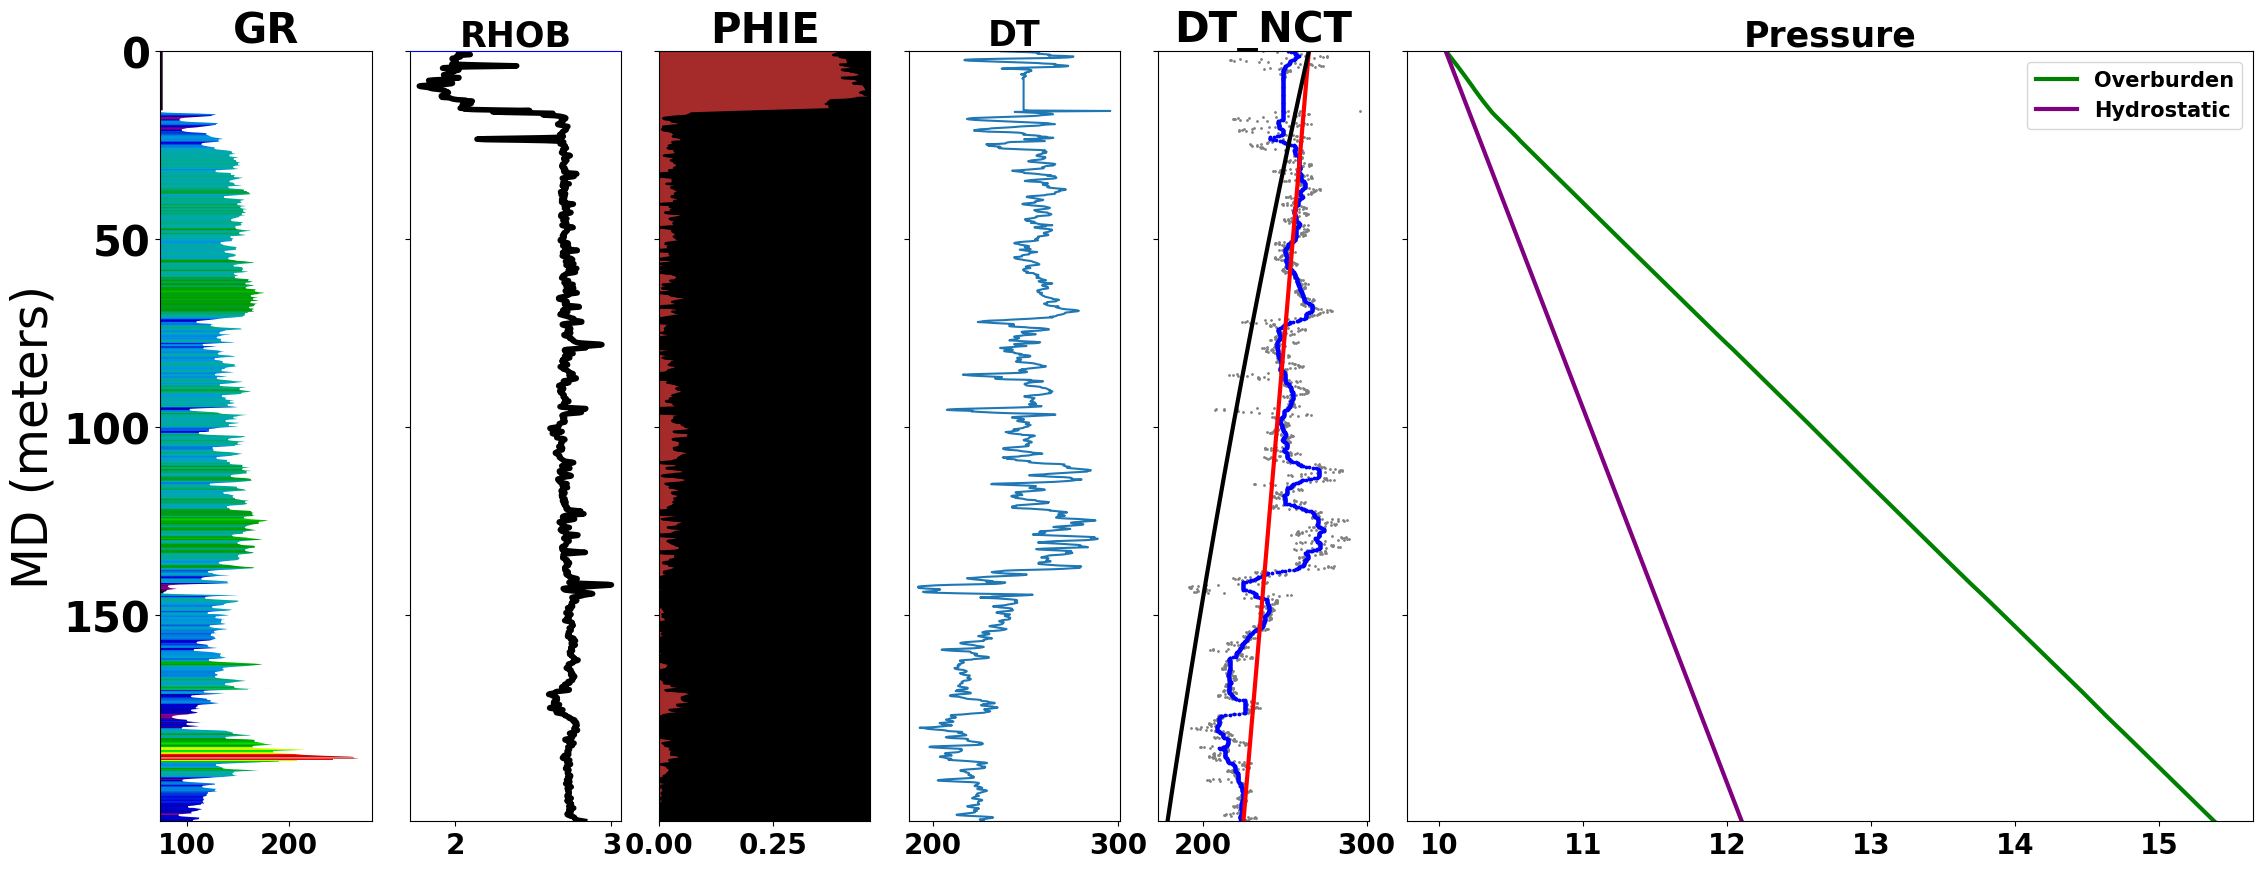

In [17]:
curves_plot(df,["GR","RHOB","PHIE","DT",f"DT_{smooth}","Pressure Profile"],fit=True)

# Pore Pressure


$$
P_{pg}=\sigma v_{g}-\left(\sigma v_{g}-P_{hg}\right)\left(\frac{\Delta t_n}{\Delta t}\right)^m 
$$


$$
P_f=P_{sea}+P_{pg} Z
$$


In [18]:
def compute_PPG_from_Eaton_Transit (obg,hbg,DTc_NCT,DT, Eaton_coefficient = 3):
    return obg-(obg-hbg)*(DTc_NCT/DT)**Eaton_coefficient

In [19]:
curves_list=[]
for i in df.columns:
    if "DT" in i:
        curves_list.append(i)

In [20]:
select_dt_curve = curves_list[1]

In [21]:
df['Pore_Pressure_Gradient_'+select_dt_curve] = compute_PPG_from_Eaton_Transit(df['Overburden_Gradient'],df['Hydrostatic_Pressure_Gradient'],df['DT_NCT'],df[select_dt_curve])
df["Pore_Pressure"] = P_mudline + df['Pore_Pressure_Gradient_'+select_dt_curve] * df["MD"]

2
1233


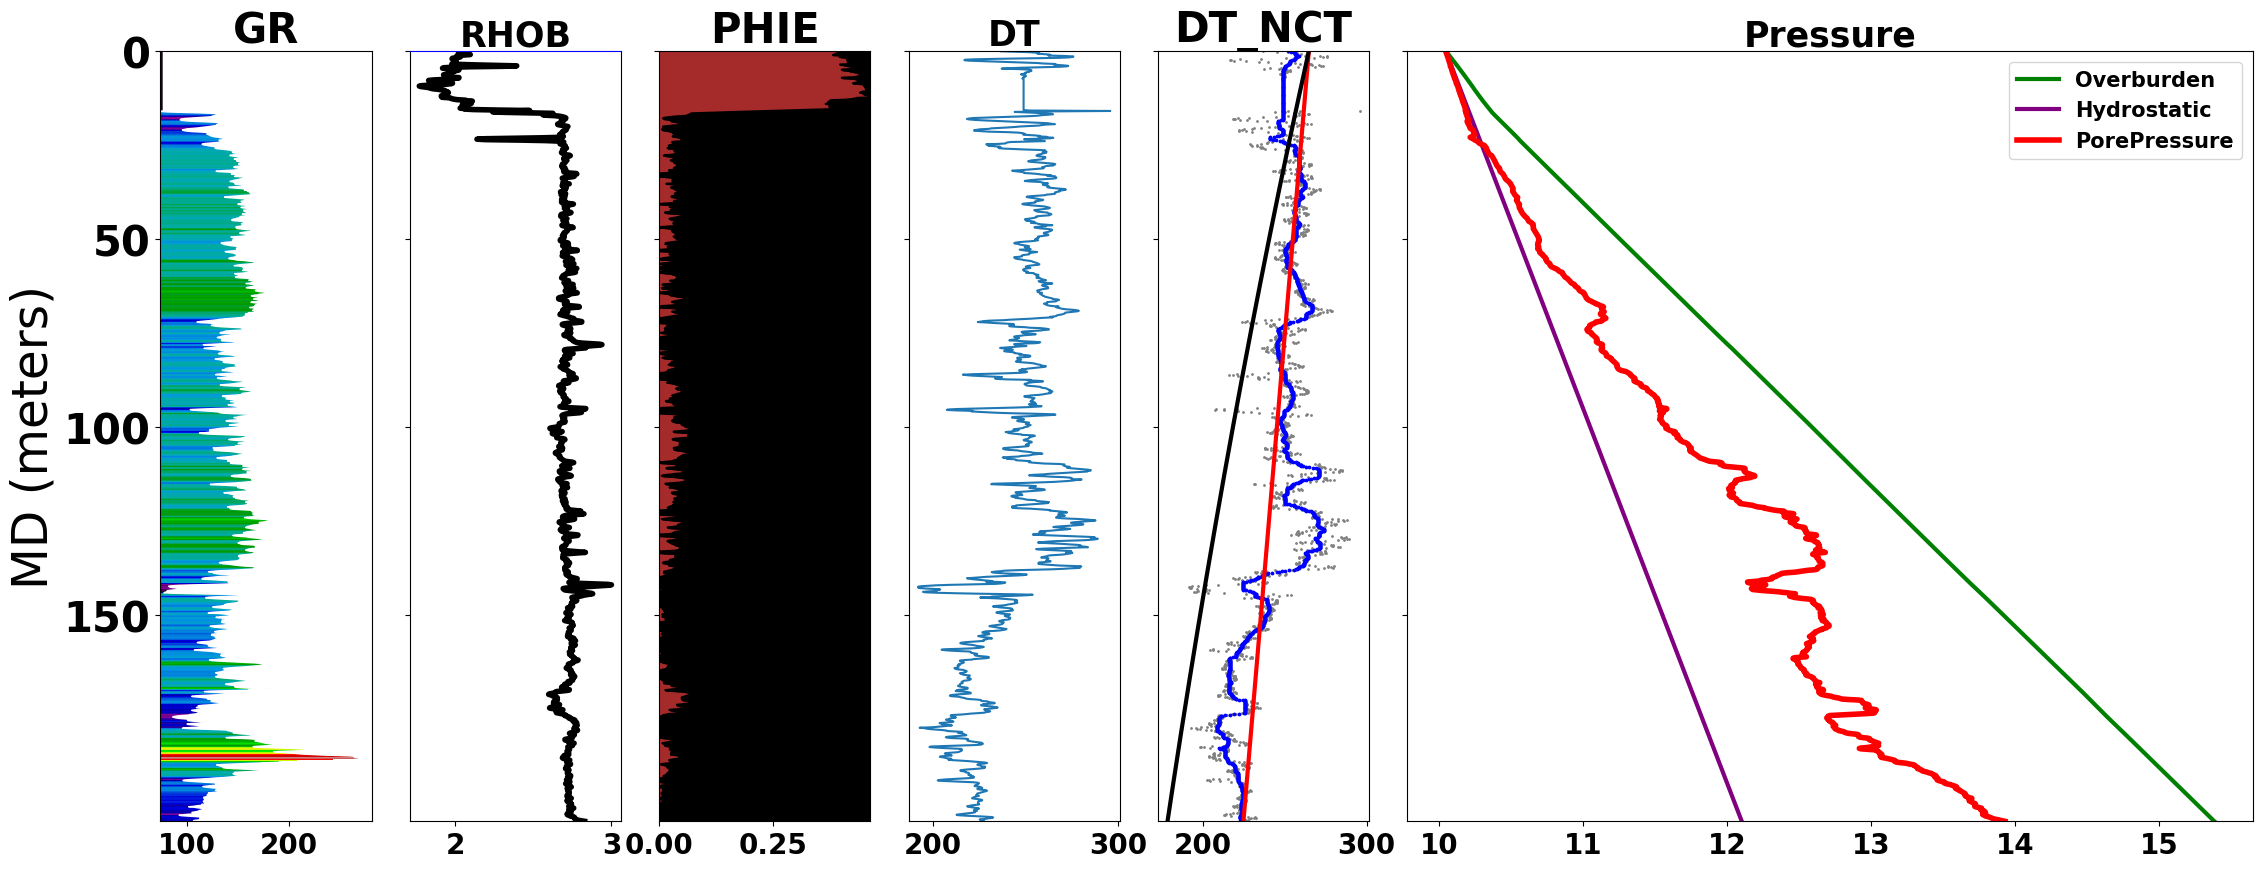

In [22]:
curves_plot(df,["GR","RHOB","PHIE","DT",f"DT_{smooth}","Pressure Profile"],fit=True)

# Horizontal Maximum and Minimum Stress

In [23]:
mu=0.2
ratio = (np.sqrt((mu**2) + 1) + mu)**2
df["Sh_lower"] = ((df["Ovb Pressure"] - df["Pore_Pressure"] ) / ratio) + df["Pore_Pressure"] 
df["Sh_upper"] =  (ratio * (df["Ovb Pressure"]  - df["Pore_Pressure"] )) + df["Pore_Pressure"]
df

,MD,TVD,GR,LLD,RHOB,DT,VCL,PHIE,DT_50,DT_NCT,Ovb Pressure,Overburden_Gradient,Hydrostatic Pressure,Hydrostatic_Pressure_Gradient,Pore_Pressure_Gradient_DT_50,Pore_Pressure,Sh_lower,Sh_upper
0,0.0000,0.0000,76.2033,7.4662,2.0220,236.719488,0.00000,0.40234,252.375328,264.813867,1.004792e+07,20311.879680,1.004544e+07,10045.44,8451.424975,1.004544e+07,1.004711e+07,1.004913e+07
1,0.1250,0.1250,76.2033,6.3797,2.0220,245.555118,0.00000,0.40234,254.143373,264.750272,1.005040e+07,20311.879680,1.004670e+07,10045.44,8705.607806,1.004653e+07,1.004913e+07,1.005229e+07
2,0.2500,0.2500,76.2033,5.6261,2.0220,252.375328,0.00000,0.40234,255.911417,264.686693,1.005288e+07,20311.879680,1.004795e+07,10045.44,8952.694005,1.004768e+07,1.005117e+07,1.005542e+07
3,0.3750,0.3750,76.2033,5.1995,2.0252,255.911417,0.00000,0.40047,256.197671,264.623129,1.005536e+07,20344.025088,1.004921e+07,10045.44,8995.604208,1.004881e+07,1.005321e+07,1.005856e+07
4,0.5000,0.5000,76.2033,4.8673,2.0408,257.545932,0.00000,0.39135,256.483924,264.559581,1.005786e+07,20500.733952,1.005046e+07,10045.44,9026.431837,1.004995e+07,1.005527e+07,1.006172e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,204.2475,204.2475,110.7393,19.3581,2.7705,225.314304,0.34153,0.00000,223.575295,178.844873,1.537219e+07,27830.891520,1.209720e+07,10045.44,18727.086657,1.387040e+07,1.487972e+07,1.610495e+07
1635,204.3725,204.3725,106.7476,20.0492,2.7780,225.558727,0.30206,0.00000,223.860892,178.801909,1.537560e+07,27906.232320,1.209845e+07,10045.44,18805.371345,1.388874e+07,1.488802e+07,1.610107e+07
1636,204.4975,204.4975,105.7287,19.7622,2.7923,226.660433,0.29198,0.00000,223.575295,178.758955,1.537902e+07,28049.882112,1.209971e+07,10045.44,18847.258734,1.389966e+07,1.489391e+07,1.610083e+07
1637,204.6225,204.6225,108.1828,18.6457,2.8107,227.619751,0.31625,0.00000,223.289698,178.716011,1.538247e+07,28234.718208,1.210096e+07,10045.44,18908.624137,1.391457e+07,1.490111e+07,1.609869e+07


2
1233


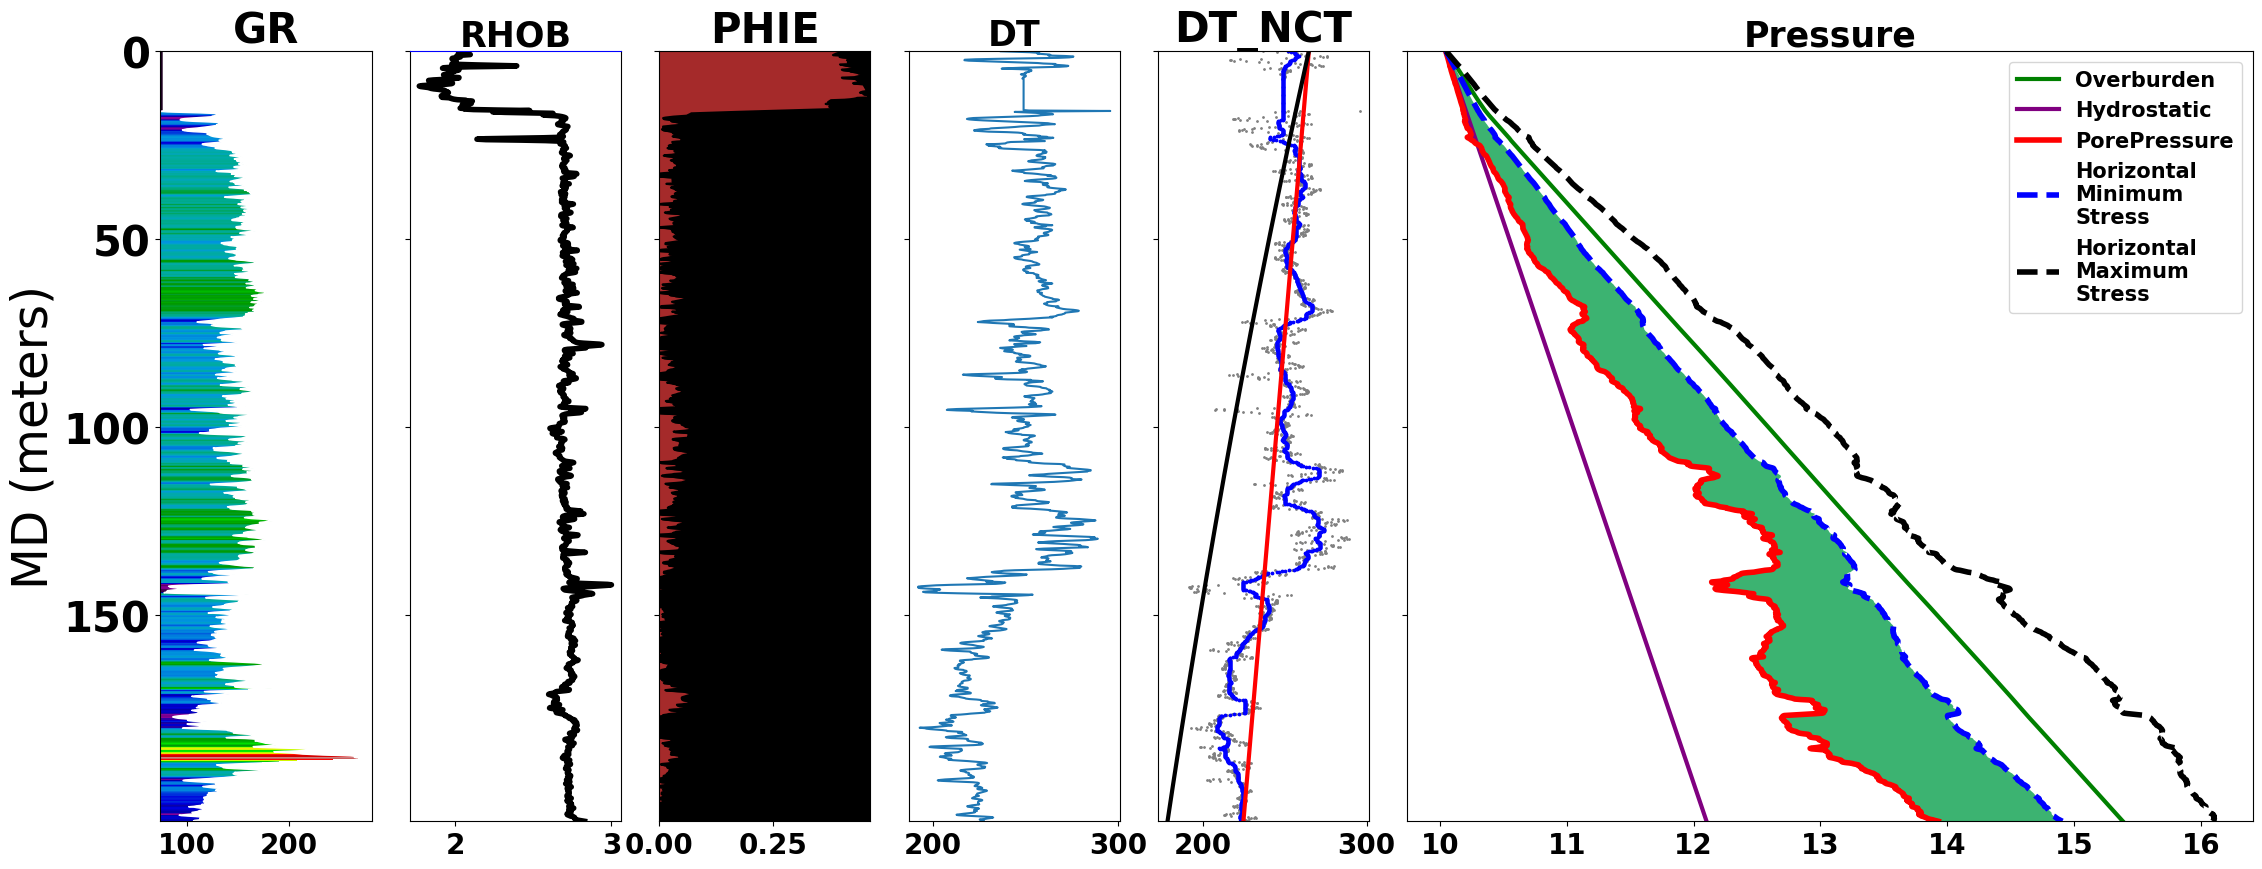

In [24]:
curves_plot(df,["GR","RHOB","PHIE","DT",f"DT_{smooth}","Pressure Profile"],fit=True)

# Effective Stress

$$
σ_{v} = σ_{e} - P_{f}
$$

In [25]:
df['Effective_stress'] = df['Ovb Pressure'] - df['Pore_Pressure']

2
1233


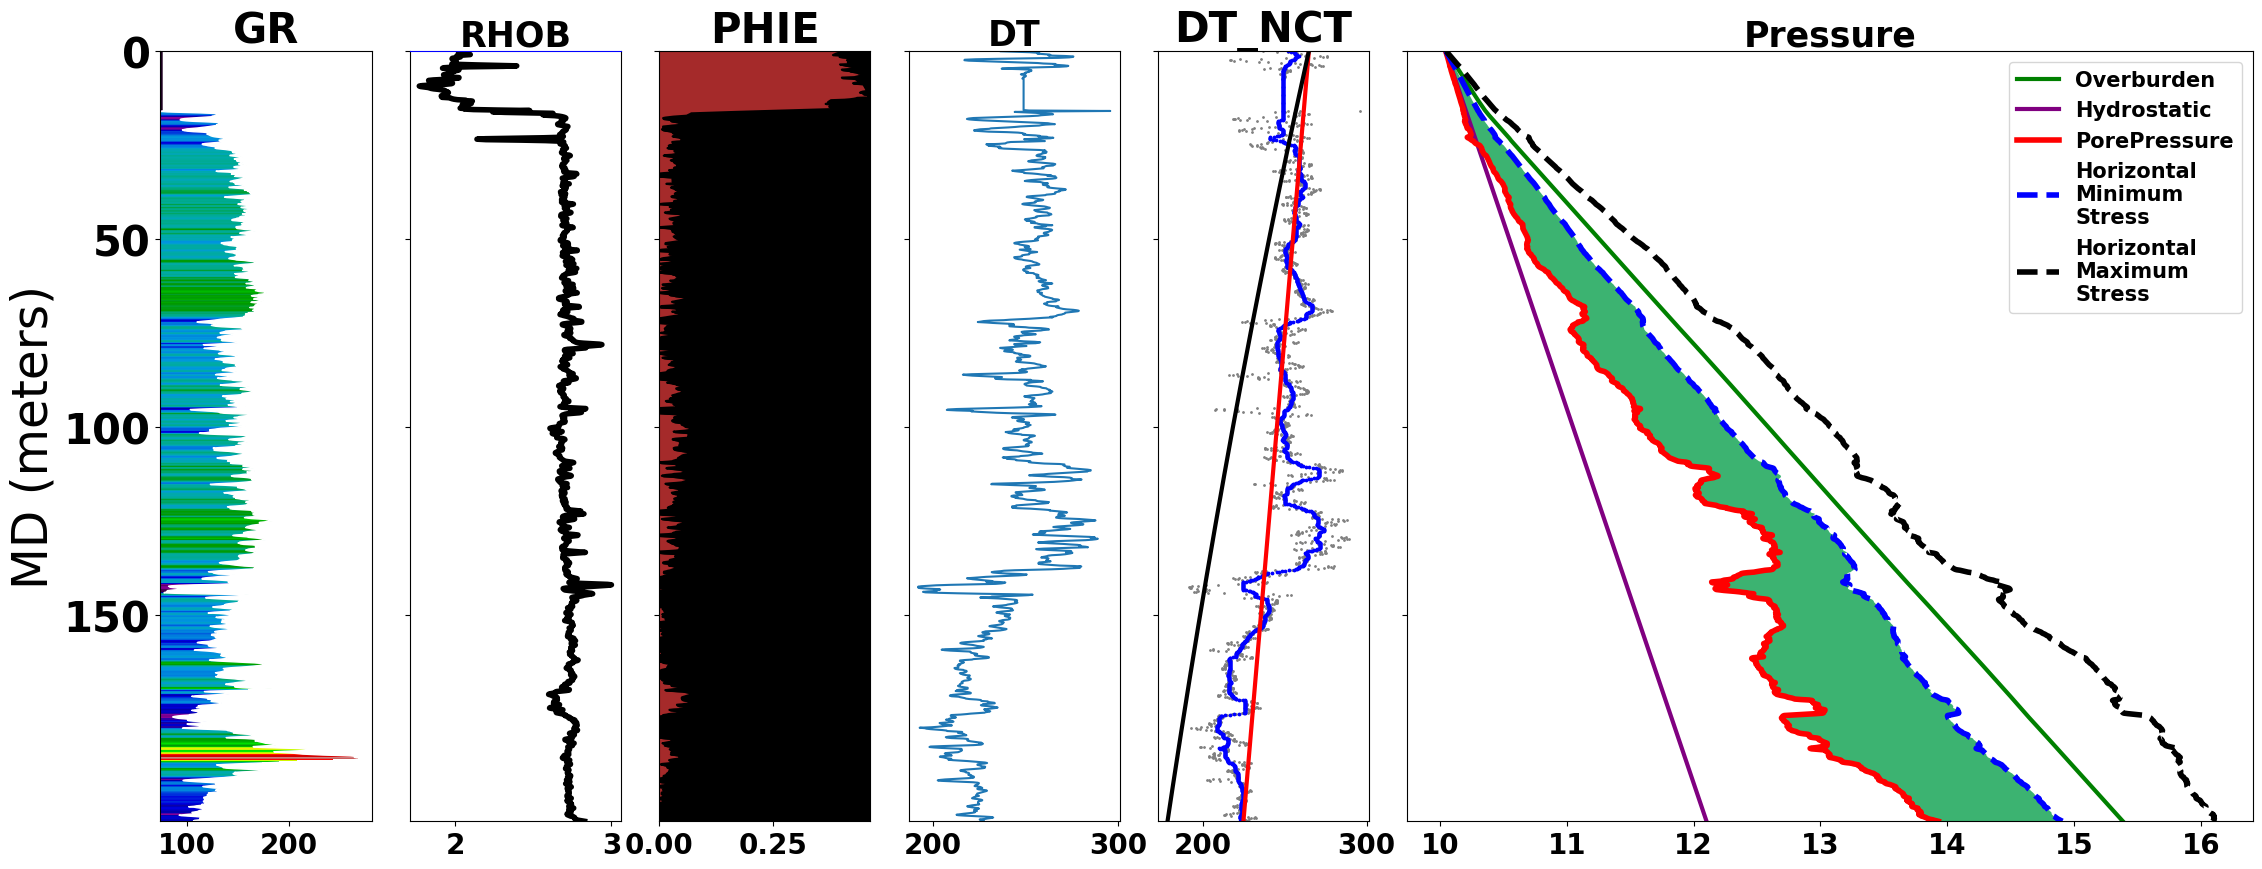

In [26]:
curves_plot(df,["GR","RHOB","PHIE","DT",f"DT_{smooth}","Pressure Profile"],fit=True)